<a href="https://colab.research.google.com/github/ShauryaJain03/Deep-Learning-Tensorflow/blob/main/regression_problem_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [31]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
#one hot encode the categorical data
insurance_data=pd.get_dummies(insurance)
insurance_data

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [33]:
x=insurance_data.drop("charges",axis=1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [34]:
y=insurance_data["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [19]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss="mae",
                optimizer="SGD",
                metrics=["mae"])


model_1.fit(x_train,y_train,epochs=100,verbose=0)

In [21]:
model_1.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 9942.3398 - mae: 9942.3398


[9942.33984375, 9942.33984375]

In [36]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])


h_2=model_2.fit(x_train,y_train,epochs=200,verbose=0)

In [37]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3514.3340 - mae: 3514.3340


[3514.333984375, 3514.333984375]

<Axes: >

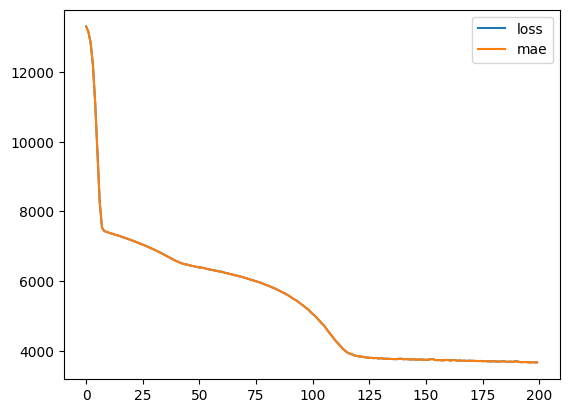

In [38]:
pd.DataFrame(h_2.history).plot()

In [39]:
h_3=model_2.fit(x_train,y_train,epochs=200,verbose=0)

In [41]:
model_2.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.5349 - mae: 3161.5349


[3161.534912109375, 3161.534912109375]

A common practice when working with neural networks is to make sure all of the data you pass to them is in the range 0 to 1.

This practice is called normalization (scaling all values from their original range to, e.g. between 0 and 100,000 to be between 0 and 1).

There is another process call standardization which converts all of your data to unit variance and 0 mean.

These two practices are often part of a preprocessing pipeline (a series of functions to prepare your data for use with neural networks).

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:

Turning all of your data to numbers (a neural network can't handle strings).

Making sure your data is in the right shape (verifying input and output shapes).

Feature scaling:

Normalizing data (making sure all values are between 0 and 1). This is done by subtracting the minimum value then dividing by the maximum value minus the minimum. This is also referred to as min-max scaling.

Standardization (making sure all values have a mean of 0 and a variance of 1). This is done by subtracting the mean value from the target feature and then dividing it by the standard deviation.
Which one should you use?
With neural networks you'll tend to favour normalization as they tend to prefer values between 0 and 1 (you'll see this espcially with image processing), however, you'll often find a neural network can perform pretty well with minimal feature scaling.

In [42]:
#preprocessing the data
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)


In [50]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


Now, just as before, we need to transform the non-numerical columns into numbers and this time we'll also be normalizing the numerical columns with different ranges (to make sure they're all between 0 and 1).

To do this, we're going to use a few classes from Scikit-Learn:

make_column_transformer - build a multi-step data preprocessing function for the folllowing transformations:
MinMaxScaler - make sure all numerical columns are normalized (between 0 and 1).
OneHotEncoder - one hot encode the non-numerical columns.
Let's see them in action.

In [47]:
x_train_normal.shape , x_train.shape

((1070, 11), (1070, 6))

In [55]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

h_4=model_3.fit(x_train_normal,y_train,epochs=200,verbose=0)

In [57]:
model_3.evaluate(x_test_normal,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3164.3374 - mae: 3164.3374


[3164.33740234375, 3164.33740234375]

<Axes: >

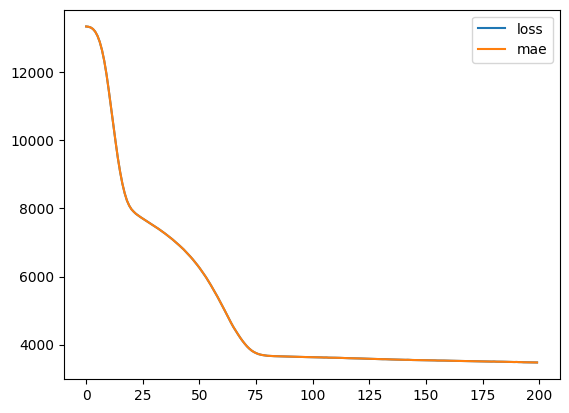

In [58]:
pd.DataFrame(h_4.history).plot()